## Business problem summary:
* They have 4 stores as of 2021. They want to scale up there businesses.
* They need to know their customer bases to know where to setup location and how to position the brand
* They dont want customers to do whay they used to but to expand their consumption to a broader ranges of items in the menu
* They conduct survey to customer and non customer to gain customer understanding
#### => We will first have a look at the survey result


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import gower
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import umap
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from scipy.stats import bartlett
import warnings
# Turn off all warnings
warnings.filterwarnings("ignore")

In [2]:
nonc_df = pd.read_excel('M-0866X.xlsx', sheet_name = 'Noncustomer Survey')
c_df = pd.read_excel('M-0866X.xlsx', sheet_name = 'Customer Survey')

### Lets have a look at questions in survey

In [3]:
for i in c_df.columns.to_list():
    print(i)

obs
How many times in the last week did you do the following? - Make and eat lunch at home
How many times in the last week did you do the following? - Bring own lunch to work
How many times in the last week did you do the following? - Buy lunch at workplace (e.g., cafeteria)
How many times in the last week did you do the following? - Buy lunch at a restaurant / food court / food truck
How many times in the last week did you do the following? - Skipped lunch / ate a small snack item
How many times in the last week did you do the following? - Other (please specify):
Please specify the top five restaurants you have visited in the last six months in order of visit frequency.      - Most frequent
Please specify the top five restaurants you have visited in the last six months in order of visit frequency.      - Second most frequent
Please specify the top five restaurants you have visited in the last six months in order of visit frequency.      - Third most frequent
Please specify the top fiv

### okay now we look at behaviorial questions that have numerical rating 

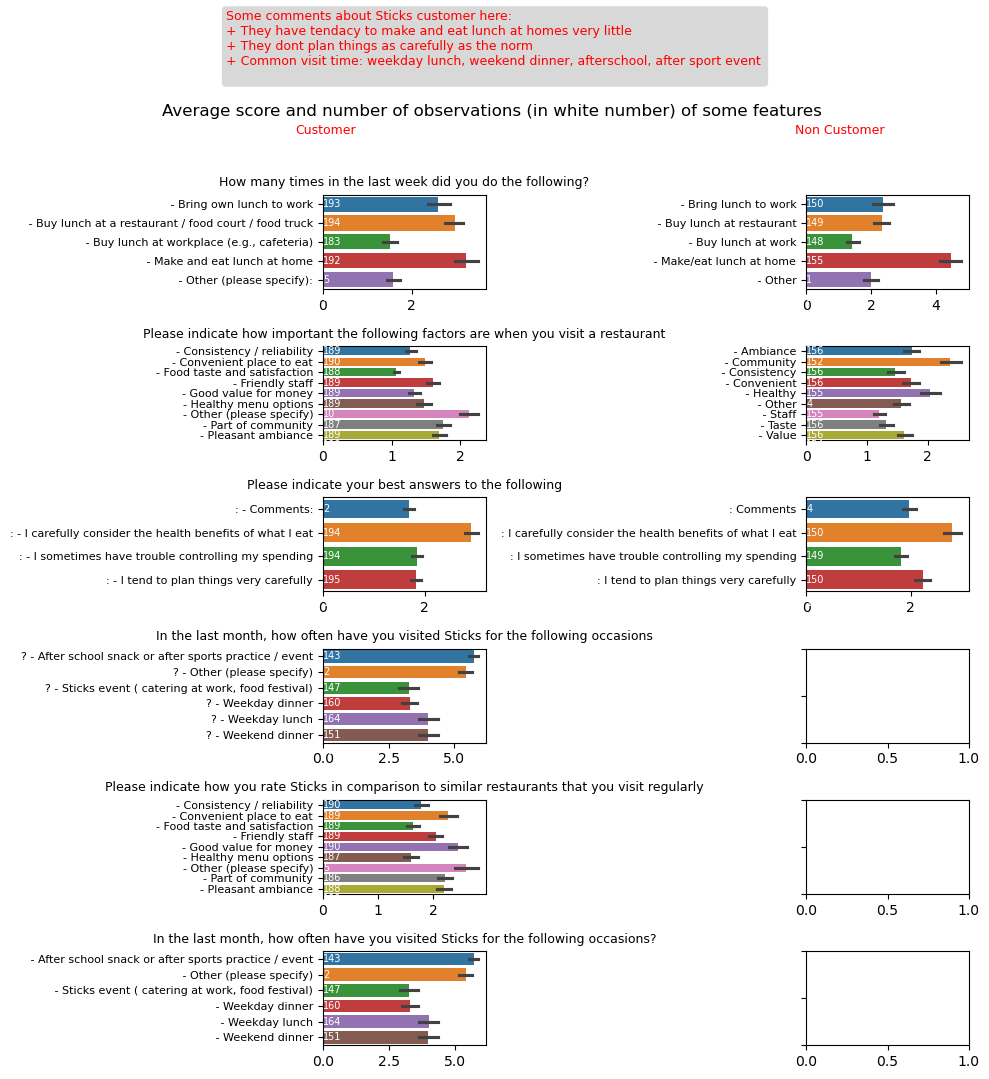

In [4]:
col_check_list = [
'How many times in the last week did you do the following?'
,'Please indicate how important the following factors are when you visit a restaurant'
,'Please indicate your best answers to the following'
,'In the last month, how often have you visited Sticks for the following occasions'
,'Please indicate how you rate Sticks in comparison to similar restaurants that you visit regularly'
,'In the last month, how often have you visited Sticks for the following occasions?'
]


fig, axes = plt.subplots(6,2, figsize = (10,10))

for i,col_check in enumerate(col_check_list) :
    col_list = [col for col in c_df.columns if col_check in col]
    col_list = sorted(col_list)
    sns.barplot( data = c_df[col_list], ax = axes[i,0] , orient='h')
    axes[i,0].set_title(col_check,fontsize = 9)
#    axes[i,0].set_yticks(range(0,len(col_list),1))
    axes[i,0].set_yticklabels([col.replace(col_check,'') for col in col_list], fontsize = 8)
    for y in range(len(col_list)):
        count = c_df[col_list[y]].count()
        axes[i,0].text(0,y,f'{count}',color = 'white', fontsize = 7 , va = 'center')
#    axes[i, 0].set_ylim(-1, len(col_list))  # Set y-axis limits
#    axes[i, 0].margins(y=0.2)  # Add 10% margin cushion

    col_list = [col for col in nonc_df.columns if col_check in col]
    col_list = sorted(col_list)
    sns.barplot( data = nonc_df[col_list], ax = axes[i,1] , orient='h')
    tick_list =  [col.replace(col_check,'') for col in col_list]
    axes[i,1].set_yticklabels(tick_list, fontsize = 8)
    for y in range(len(col_list)):
        count = nonc_df[col_list[y]].count()
        axes[i,1].text(0,y,f'{count}',color = 'white', fontsize = 7 , va = 'center')

fig.subplots_adjust(top=0.8)
plt.suptitle('Average score and number of observations (in white number) of some features \n')
fig.text(0.3,0.95, s = 'Customer', fontsize = 9 , color = 'red')
fig.text(0.8,0.95, s = 'Non Customer', fontsize = 9 , color = 'red')
comment = ('Some comments about Sticks customer here: \n'
            '+ They have tendacy to make and eat lunch at homes very little \n'
          '+ They dont plan things as carefully as the norm \n'
          '+ Common visit time: weekday lunch, weekend dinner, afterschool, after sport event \n'
          )
fig.text(0.5,1.001,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 9, multialignment='left'
)



plt.tight_layout(rect = [0,0,1,0.97])
plt.show()


### Some more questions that have categorical answers

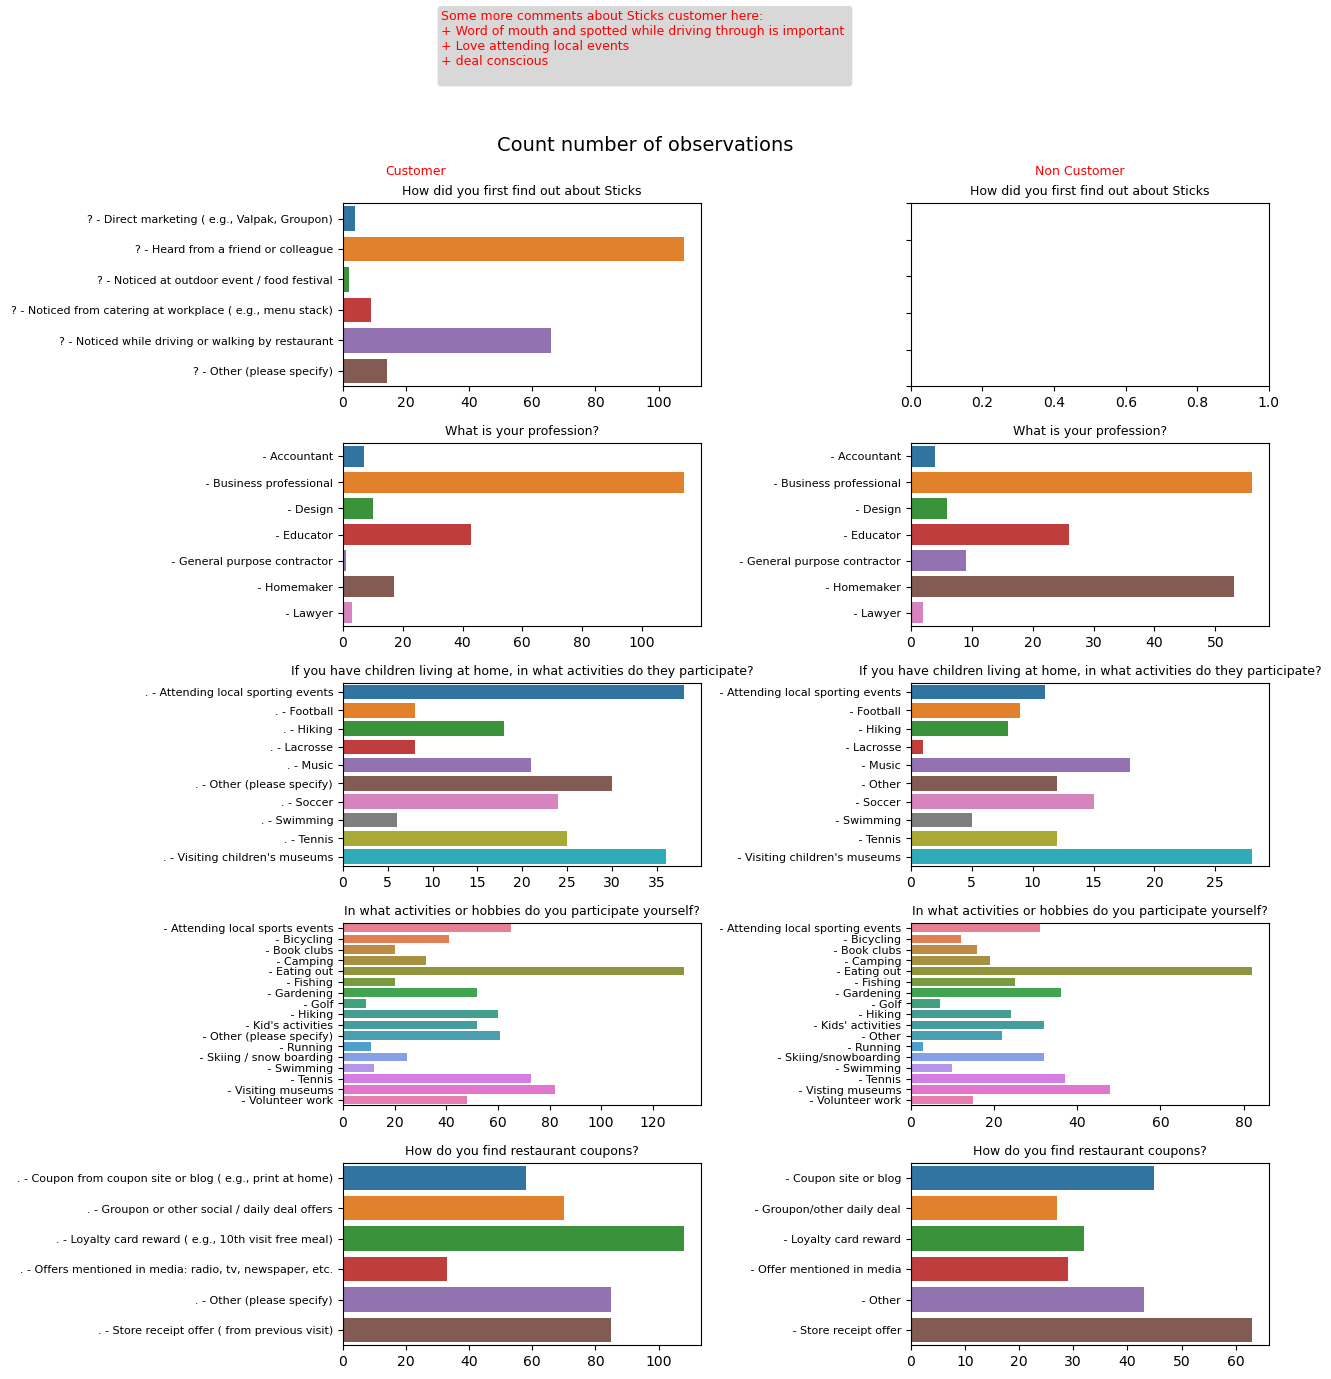

In [5]:
col_check_list = [
'How did you first find out about Sticks'
    ,'What is your profession?'
    ,'If you have children living at home, in what activities do they participate?'
    ,'In what activities or hobbies do you participate yourself?'
    ,'How do you find restaurant coupons?'
]

fig, axes = plt.subplots(5,2, figsize = (13,13))

for i,col_check in enumerate(col_check_list) :
    col_list = [col for col in c_df.columns if col_check in col]
    col_list = sorted(col_list)
    sns.barplot( data = c_df[col_list], ax = axes[i,0] , orient='h', estimator = 'count_nonzero' )
    axes[i,0].set_title(col_check,fontsize = 9)
#    axes[i,0].set_yticks(range(len(col_list)))
    axes[i,0].set_yticklabels([col.replace(col_check,'').replace('Please check all that apply','') for col in col_list], fontsize = 8)

    col_list = [col for col in nonc_df.columns if col_check in col]
    col_list = sorted(col_list)
    sns.barplot( data = nonc_df[col_list], ax = axes[i,1] , orient='h', estimator = 'count_nonzero' )
    axes[i,1].set_title(col_check,fontsize = 9)
#    axes[i,1].set_yticks(range(len(col_list)))
    axes[i,1].set_yticklabels([col.replace(col_check,'') for col in col_list], fontsize = 8)

fig.text(0.3,0.93, s = 'Customer', fontsize = 9 , color = 'red')
fig.text(0.8,0.93, s = 'Non Customer', fontsize = 9 , color = 'red')
comment = ('Some more comments about Sticks customer here: \n'
           '+ Word of mouth and spotted while driving through is important \n' 
            '+ Love attending local events \n'
            '+ deal conscious \n'
          )
fig.text(0.5,1.001,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 9, multialignment='left'
)
fig.suptitle('Count number of observations', y = 0.96, fontsize = 14)
plt.tight_layout(rect = [0,0,1,0.96])
plt.show()


### Some more demographic stuff

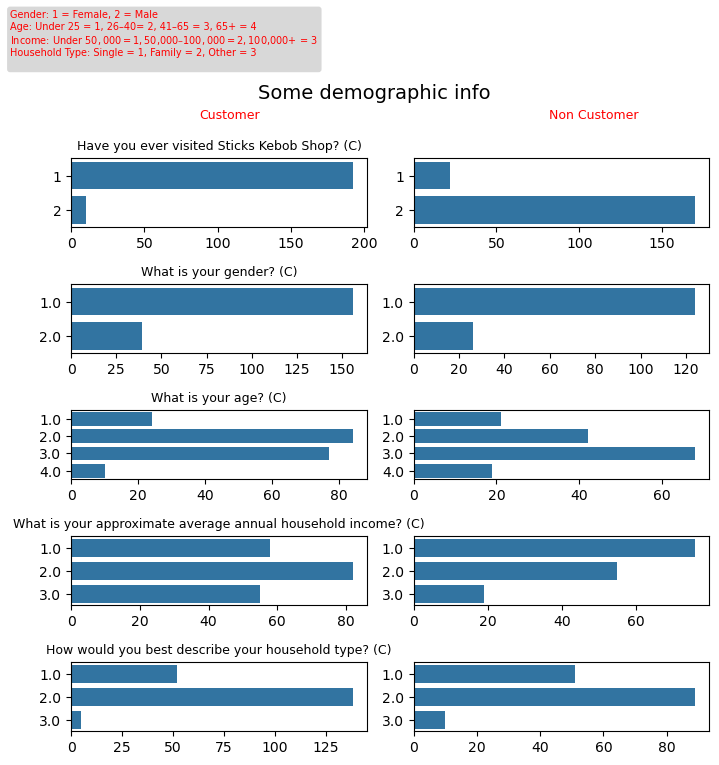

In [6]:
col_check_list = [ 
'Have you ever visited Sticks Kebob Shop?'
,'What is your gender?'
,'What is your age?'
,'What is your approximate average annual household income?'
,'How would you best describe your household type?'
]

fig, axes = plt.subplots(len(col_check_list), 2, figsize=(7, 7))

for i, col_check in enumerate(col_check_list):
    # For c_df
    c_df_c = c_df[col_check].value_counts().sort_index()  
    sns.barplot(
        x=c_df_c.values,
        y=c_df_c.index,
        ax=axes[i, 0],
        orient="h"
    )
    axes[i, 0].set_title(f"{col_check} (C)", fontsize=9)
    axes[i, 0].set_ylabel("")
    # For nonc_df
    nonc_df_c = nonc_df[col_check].value_counts().sort_index()  
    sns.barplot(
        x=nonc_df_c.values,
        y=nonc_df_c.index,
        ax=axes[i, 1],
        orient="h"
    )
    axes[i, 1].set_ylabel("")

fig.text(0.25,0.93, s = 'Customer', fontsize = 9 , color = 'red')
fig.text(0.75,0.93, s = 'Non Customer', fontsize = 9 , color = 'red')

comment = ('Gender: 1 = Female, 2 = Male \n'
            'Age: Under 25 = 1, 26–40= 2, 41–65 = 3, 65+ = 4 \n'
            'Income: Under $50,000 = 1, $50,000–$100,000 = 2, $100,000+ = 3 \n'
            'Household Type: Single = 1, Family = 2, Other = 3 \n'
          )
fig.text(0.2,1.001,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 7, multialignment='left', 
)

fig.suptitle('Some demographic info', fontsize = 14)
plt.tight_layout(rect = [0,0,1,0.97])
plt.show()




### Lets cluster based on some demographic, restaurant features, and occasions visit
### We will do a PCA first as there are a large number of features, then we will cluster later 

In [7]:
#prepare column features
x = ['Please indicate how important the following factors are when you visit a restaurant'
,'In the last month, how often have you visited Sticks for the following occasions'
,'What is your age?'
,'What is your approximate average annual household income?']

col_list = []

for col_check in x:
    [col_list.append(col) for col in c_df.columns if col_check in col and 'Other' not in col ]


In [23]:
#prepare dataet
df_cluster =  c_df[col_list].copy()
df_cluster[col_list[0:15]] = df_cluster[col_list[0:15]].fillna(0)
df_cluster = df_cluster.dropna()

In [9]:

df_cluster

,Please indicate how important the following factors are when you visit a restaurant - Convenient place to eat,Please indicate how important the following factors are when you visit a restaurant - Variety of menu options,Please indicate how important the following factors are when you visit a restaurant - Good value for money,Please indicate how important the following factors are when you visit a restaurant - Healthy menu options,Please indicate how important the following factors are when you visit a restaurant - Food taste and satisfaction,Please indicate how important the following factors are when you visit a restaurant - Friendly staff,Please indicate how important the following factors are when you visit a restaurant - Pleasant ambiance,Please indicate how important the following factors are when you visit a restaurant - Consistency / reliability,Please indicate how important the following factors are when you visit a restaurant - Part of community,"In the last month, how often have you visited Sticks for the following occasions? - Weekday lunch","In the last month, how often have you visited Sticks for the following occasions? - Weekday dinner","In the last month, how often have you visited Sticks for the following occasions? - Weekend lunch","In the last month, how often have you visited Sticks for the following occasions? - Weekend dinner","In the last month, how often have you visited Sticks for the following occasions? - Sticks event ( catering at work, food festival)","In the last month, how often have you visited Sticks for the following occasions? - After school snack or after sports practice / event",What is your age?,What is your approximate average annual household income?
0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,6.0,4.0,6.0,6.0,6.0,6.0,3.0,2.0
1,1.0,3.0,1.0,4.0,1.0,2.0,2.0,2.0,4.0,3.0,6.0,6.0,6.0,6.0,6.0,2.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,6.0,2.0,6.0,6.0,2.0,3.0
3,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,5.0,1.0,1.0,1.0,6.0,6.0,2.0,3.0
4,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,6.0,6.0,6.0,6.0,2.0,2.0
198,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,6.0,6.0,3.0,2.0
199,1.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0
200,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0


In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Perform KMO test
kmo_all, kmo_model = calculate_kmo(df_cluster)
print(f"KMO Test: {kmo_model}")  # KMO score should be > 0.6 for suitable data


KMO Test: 0.8570403731171414


In [11]:
# Bartlett's test of sphericity
chi2, p_value = bartlett(*[df_cluster[col] for col in df_cluster.columns])
print(f"Bartlett's Test p-value: {p_value}")  # p-value should be < 0.05 to continue with FA


Bartlett's Test p-value: 0.0


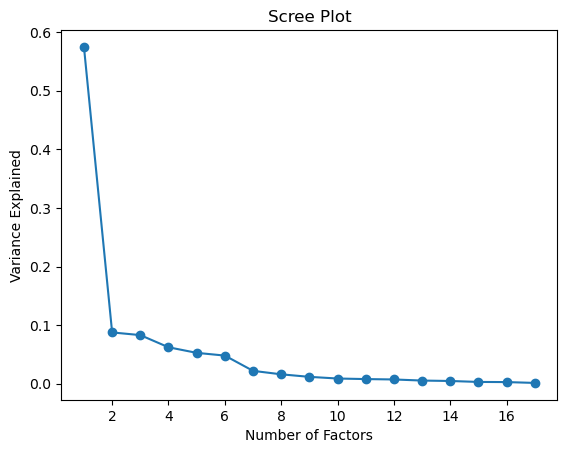

Eigenvalues: [26.09627612  3.97641319  3.7685464   2.82633084  2.39370889  2.18143926
  0.99952767  0.72977062  0.53423768  0.4050764   0.36179701  0.33146996
  0.24664     0.21389132  0.13989678  0.12858791  0.06379942]


In [12]:
# Perform PCA (Principal Component Analysis) to get eigenvalues
pca = PCA()
pca.fit(df_cluster)

# Plot the explained variance (Scree plot)
plt.plot(range(1, len(df_cluster.columns)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Variance Explained')
plt.show()

# Eigenvalues (should be > 1)
eigenvalues = pca.explained_variance_
print(f"Eigenvalues: {eigenvalues}")


In [13]:
# Create a FactorAnalyzer object with the number of factors you want to extract (e.g., 3)
fa = FactorAnalyzer(n_factors=2, rotation=None)
# Fit the model
fa.fit(df_cluster)
# Get the factor loadings
loadings = fa.loadings_
print(f"Factor Loadings:\n{loadings}")

Factor Loadings:
[[ 0.54115927 -0.15748461]
 [ 0.6339848  -0.31804368]
 [ 0.58646017 -0.28947119]
 [ 0.50938617 -0.30343262]
 [ 0.56548403 -0.24055945]
 [ 0.70240657 -0.38831873]
 [ 0.67410601 -0.41371513]
 [ 0.61313583 -0.30998564]
 [ 0.526975   -0.31551575]
 [ 0.384112    0.37168883]
 [ 0.41359954  0.4383598 ]
 [ 0.51139031  0.5297892 ]
 [ 0.52213107  0.5586884 ]
 [ 0.60243212  0.68361963]
 [ 0.58907236  0.68165907]
 [ 0.22651648 -0.10370876]
 [ 0.20385833 -0.10500105]]


In [14]:
# Perform Varimax rotation (orthogonal)
fa_rotated = FactorAnalyzer(n_factors=2, rotation='varimax')
fa_rotated.fit(df_cluster)
# Get rotated factor loadings
rotated_loadings = fa_rotated.loadings_
print(f"Rotated Factor Loadings:\n{rotated_loadings}")


Rotated Factor Loadings:
[[0.53190078 0.18637683]
 [0.70075691 0.10967348]
 [0.64547698 0.10530231]
 [0.5908726  0.04914463]
 [0.5999794  0.13291259]
 [0.79728003 0.09225492]
 [0.78901122 0.05513989]
 [0.6791076  0.10411298]
 [0.61220841 0.04953488]
 [0.09653998 0.52571346]
 [0.08178529 0.59710556]
 [0.10822238 0.72834371]
 [0.10016603 0.75810313]
 [0.0928991  0.9064381 ]
 [0.0831671  0.89707779]
 [0.24460488 0.04726179]
 [0.22691791 0.03304094]]


In [15]:
df_loading = pd.DataFrame(rotated_loadings, index = df_cluster.columns)
df_loading.sort_values(by=1, ascending=False)

,0,1
"In the last month, how often have you visited Sticks for the following occasions? - Sticks event ( catering at work, food festival)",0.092899,0.906438
"In the last month, how often have you visited Sticks for the following occasions? - After school snack or after sports practice / event",0.083167,0.897078
"In the last month, how often have you visited Sticks for the following occasions? - Weekend dinner",0.100166,0.758103
"In the last month, how often have you visited Sticks for the following occasions? - Weekend lunch",0.108222,0.728344
"In the last month, how often have you visited Sticks for the following occasions? - Weekday dinner",0.081785,0.597106
"In the last month, how often have you visited Sticks for the following occasions? - Weekday lunch",0.096540,0.525713
Please indicate how important the following factors are when you visit a restaurant - Convenient place to eat,0.531901,0.186377
Please indicate how important the following factors are when you visit a restaurant - Food taste and satisfaction,0.599979,0.132913
Please indicate how important the following factors are when you visit a restaurant - Variety of menu options,0.700757,0.109673
Please indicate how important the following factors are when you visit a restaurant - Good value for money,0.645477,0.105302


### Seems like factor 1 is the niceness of restaurant ,factor 2 is special occations visit 

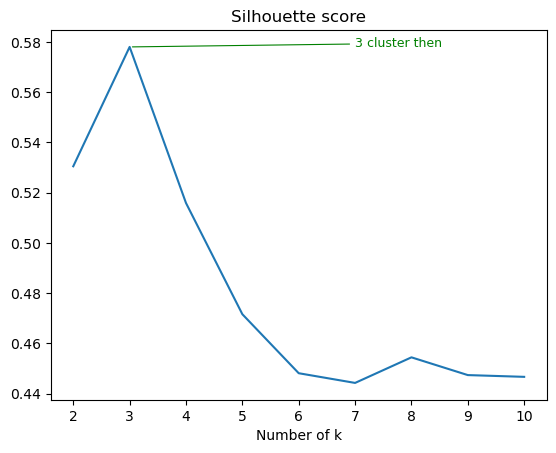

In [32]:
factor_scores = fa.transform(df_cluster)

score_list = []
for i in range (2,11,1):
    model_cluster =  KMeans(i, random_state = 42)
    label = model_cluster.fit_predict(factor_scores)
    score = silhouette_score(factor_scores,label)
    score_list.append(score)
sns.lineplot(x = range(2,11,1) , y = score_list)
plt.title('Silhouette score')
plt.xlabel('Number of k')
plt.annotate(
    '3 cluster then',  # Annotation text
    xy=(3, score_list[1] ) , # Point to annotate
    xytext=(5 + 2, score_list[1]),  # Text position
    arrowprops=dict(arrowstyle='-', color='green', lw=0.8),  # Minimal arrow
    fontsize=9,
    color='green'
)

plt.show()


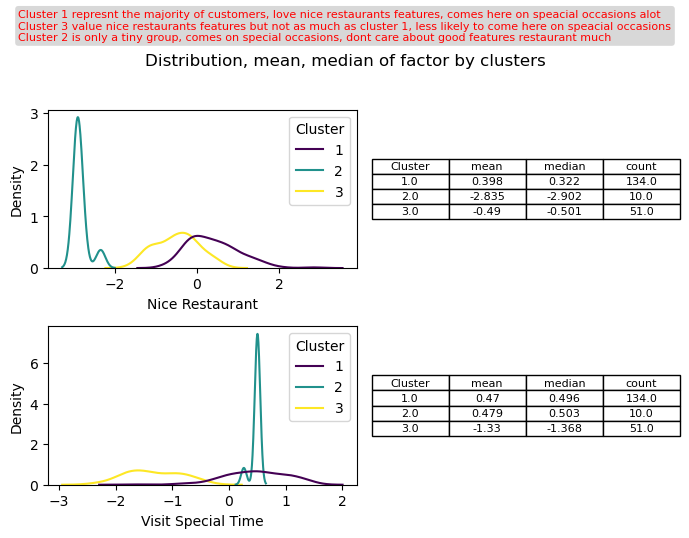

In [39]:
model_cluster =  KMeans(3, random_state = 42)
clusters = model_cluster.fit_predict(factor_scores)
df_factor = pd.DataFrame(factor_scores, columns = ['Nice Restaurant', 'Visit Special Time'])
df_factor['Cluster'] = clusters + 1
col_list = df_factor.columns.to_list()
col_list.remove('Cluster')

fig, axes = plt.subplots(2,2, figsize = (7,5))
axes = axes.flatten()
for i,col in enumerate(col_list):
    sns.kdeplot(data = df_factor, x = col, hue = 'Cluster', ax = axes[i*2], common_norm = False, palette="viridis")
#    axes[i*2].legend(fontsize = 'small', loc = 'upper right')
    df_cluster_gb =  df_factor[[col ,'Cluster']].groupby('Cluster').agg(['mean', 'median','count'])
    df_cluster_gb = df_cluster_gb.round(3)
    df_cluster_gb.columns = ['_'.join(col).strip() for col in df_cluster_gb.columns]
    df_cluster_gb = df_cluster_gb.reset_index()
    axes[i * 2 + 1].axis('off')  # Hide axes and gridlines for a clean table
    table = axes[i * 2 + 1].table(
        cellText=df_cluster_gb.values,
        colLabels=['Cluster' ,'mean', 'median','count'],
        cellLoc="center",
        loc="center"
    )
    # Optional: You can further tweak the table appearance here (e.g., remove borders)
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Set font size if needed
    table.scale(1, 1)  # Scale the table to fit better

fig.suptitle('Distribution, mean, median of factor by clusters')
comment = ('Cluster 1 represnt the majority of customers, love nice restaurants features, comes here on speacial occasions alot \n'
          'Cluster 3 value nice restaurants features but not as much as cluster 1, less likely to come here on speacial occasions\n'
           'Cluster 2 is only a tiny group, comes on special occasions, dont care about good features restaurant much '
          )
fig.text(0.5,1.001,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 8, multialignment='left', 
)
plt.tight_layout(rect = [0,0,1,0.96])
plt.show()


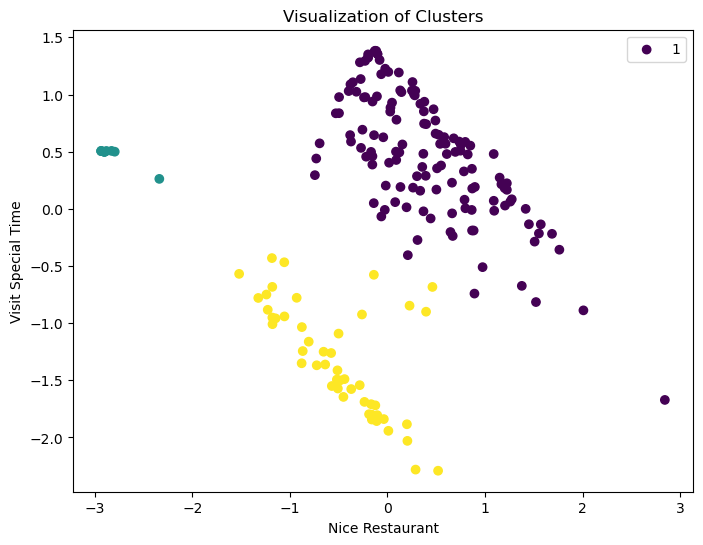

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x = df_factor.iloc[:,0], y = df_factor.iloc[:,1], c = df_factor['Cluster'] )
plt.title("Visualization of Clusters")
plt.xlabel(df_factor.columns[0])
plt.ylabel(df_factor.columns[1])
plt.legend([1,2,3])
plt.show()

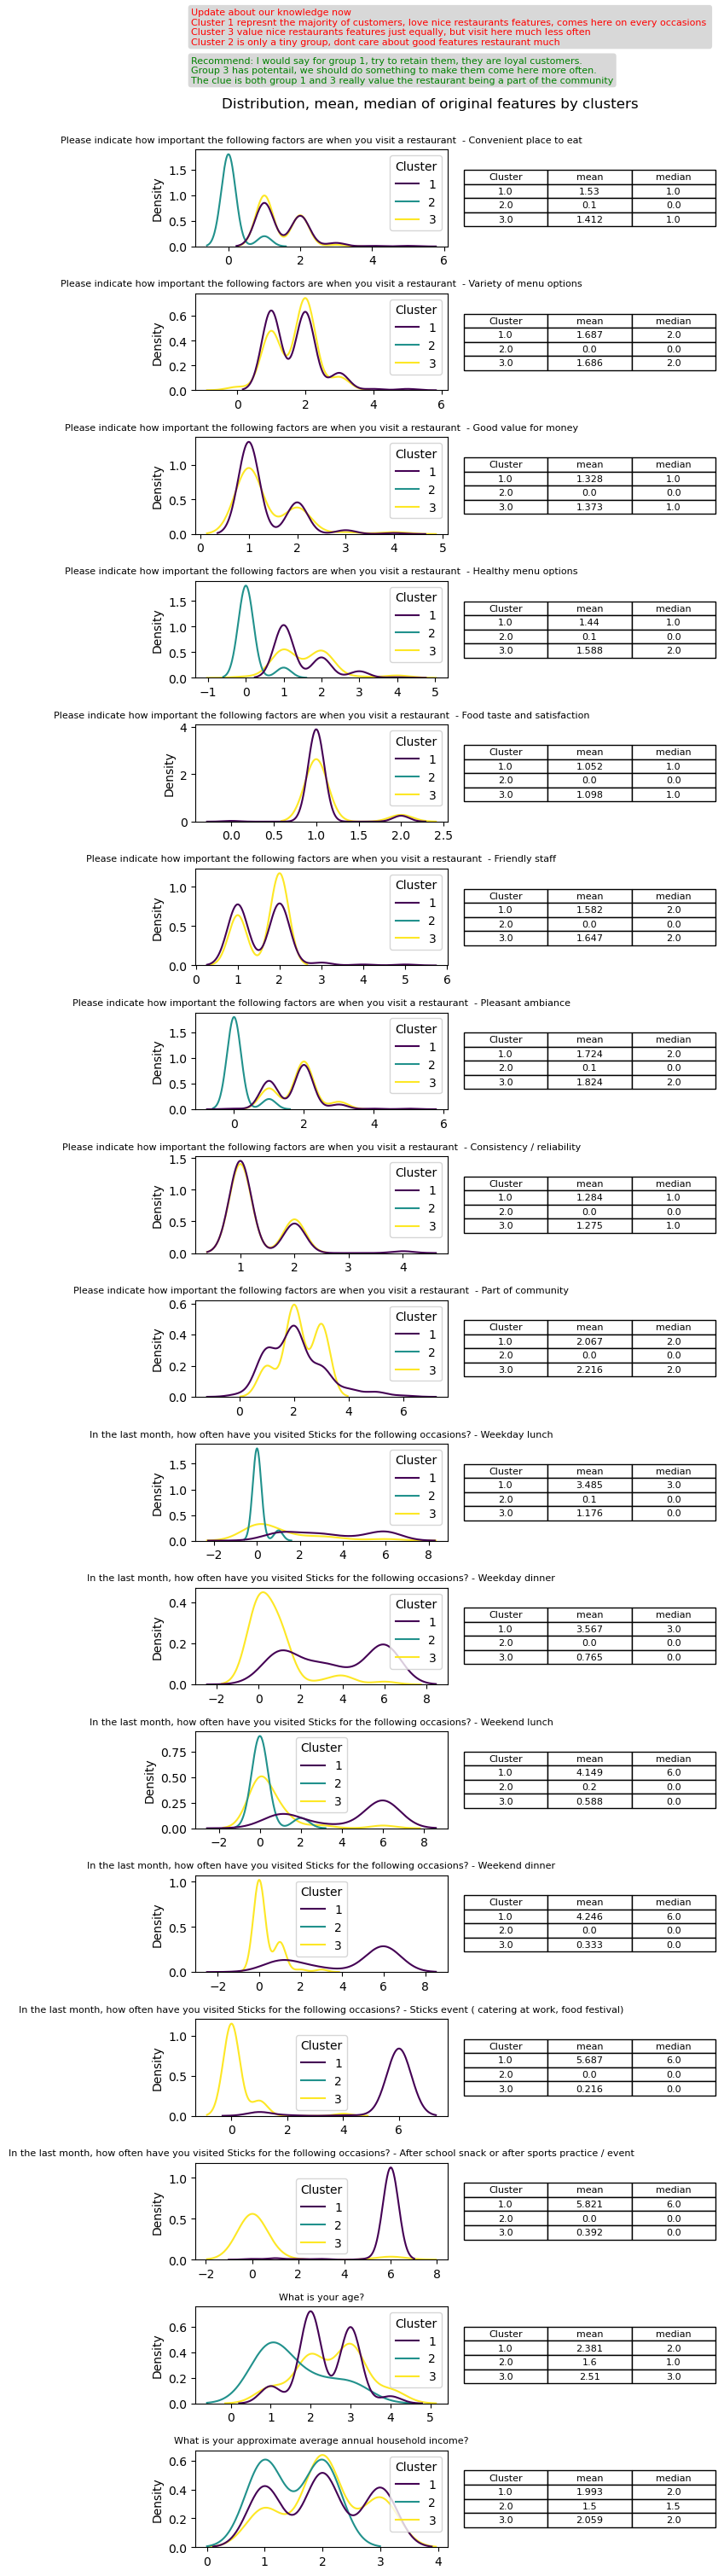

In [57]:
df_cluster['Cluster'] = clusters + 1
col_list = df_cluster.columns.to_list()
col_list.remove('Cluster')

fig, axes = plt.subplots(17,2, figsize = (7,30))
axes = axes.flatten()
for i,col in enumerate(col_list):
    sns.kdeplot(data = df_cluster, x = col, hue = 'Cluster', ax = axes[i*2], common_norm = False, palette="viridis")
#    axes[i*2].legend(fontsize = 'small', loc = 'upper right')
    df_cluster_gb =  df_cluster[[col ,'Cluster']].groupby('Cluster').agg(['mean', 'median'])
    df_cluster_gb = df_cluster_gb.round(3)
    df_cluster_gb.columns = ['_'.join(col).strip() for col in df_cluster_gb.columns]
    df_cluster_gb = df_cluster_gb.reset_index()
    axes[i*2].set_title(col , fontsize = 8)
    axes[i*2].set_xlabel('')
    axes[i * 2 + 1].axis('off')  # Hide axes and gridlines for a clean table
    table = axes[i * 2 + 1].table(
        cellText=df_cluster_gb.values,
        colLabels=['Cluster' ,'mean', 'median'],
        cellLoc="center",
        loc="center"
    )
    # Optional: You can further tweak the table appearance here (e.g., remove borders)
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Set font size if needed
    table.scale(1, 1)  # Scale the table to fit better

fig.suptitle('Distribution, mean, median of original features by clusters', y = 0.97)
comment = ('Update about our knowledge now \n'
            'Cluster 1 represnt the majority of customers, love nice restaurants features, comes here on every occasions \n'
          'Cluster 3 value nice restaurants features just equally, but visit here much less often\n'
           'Cluster 2 is only a tiny group, dont care about good features restaurant much '

          )
fig.text(0.1,0.99,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'left' , color = 'red', fontsize = 8, multialignment='left', )

comment_1 = (
           'Recommend: I would say for group 1, try to retain them, they are loyal customers. \n'
           'Group 3 has potentail, we should do something to make them come here more often. \n'
            'The clue is both group 1 and 3 really value the restaurant being a part of the community'
          )
fig.text(0.1,0.975,comment_1,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'left' , color = 'green', fontsize = 8, multialignment='left', 
)
plt.tight_layout(rect = [0,0,1,0.97])
plt.show()